# Part 1: Understanding sound data and what we can learn from looking at audio

### Import libraries

In [9]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import os
import pickle
import wave

import librosa
import librosa.display

import IPython
from IPython.display import Audio

## What is sound?

**What is sound?**

Sound is variations in pressure; for humans, it is usually variations in air pressure, though we can also hear variations underwater. It is pressure variations in the fluid surrounding the ear, which causes a bone in the ear to vibrate which in turn sensds a signal to out brain. Sound can be described as a wave, with the key characteristics being period and amplitude.

To digitally record sound, we need to record the variations in air pressure relative to the environmental baseline. This is the same as measuring the amplitude of the wave at various points in time.

To understand this better, let's use librosa to extract the contents of a single audio.

In [10]:
# load an audio file
y, sr = librosa.load('RAVDESS/Actor_01/03-01-08-02-02-02-01.wav')

The extraction consists of two elements: y, an array showing the digital record of the pressure fluctations and and sr, the sample rate.

First, let's listen to it. Then we'll examine sr and finally y.

## Examining the components of an audio file

In [11]:
print('Listen to the audio clip here')
IPython.display.display(IPython.display.Audio(data=y, rate=sr))

Listen to the audio clip here


Now that we've had a quick listen, let's examine the variable sr.

In [12]:
print(f'The sr variable has a type of {type(sr)}.')

The sr variable has a type of <class 'int'>.


In [13]:
print(f'The sample rate is {sr} Hz.')

The sample rate is 22050 Hz.


The sample rate is an integer. For this paricular recording, it is 22,050. This is measured in hertz, which means that wave's amplitude is sampled 22,050 times per second. This sample rate is fairly standard for speech quality audio. Music or film will sometimes have much higher sample rates.

Now that we've looked at the sample rate, let's look at y -- our array of amplitudes.

In [14]:
print(f'The y variable has a type of {type(y)}.')

The y variable has a type of <class 'numpy.ndarray'>.


In [15]:
print(f'The y variable has {y.ndim} dimensions and shape of {y.shape}.')

The y variable has 1 dimensions and shape of (72103,).


The y variable is a one-dimensional numpy array with a length of 79,460. This is the number of samples that make up this audio clip. Since we have our sample rate measured in samples per second, we can divide the length of y by the sample rate to get the length of the audio clip.

In [16]:
print(f'The audio clip is {len(y)/sr} seconds long.')

The audio clip is 3.2699773242630386 seconds long.


In [17]:
print(f'Using the librosa.get_duration call, we get the same length: {librosa.get_duration(y=y,sr=sr)} seconds')

Using the librosa.get_duration call, we get the same length: 3.2699773242630386 seconds


We now understand the relationship between sample rate, the length of the audio file and the actual duration of the audio clip.

Next, let's examine the magnitude of the y-variable values.

In [18]:
print('The minimum value of the elements in the y array is {:.4f}'.format(np.min(y)))
print('The maximum value of the elements in the y array is {:.4f}'.format(np.max(y)))
print('The mean value of the elements in the y array is {:.4f}'.format(np.mean(y)))

The minimum value of the elements in the y array is -0.1041
The maximum value of the elements in the y array is 0.1167
The mean value of the elements in the y array is 0.0000


The values of the elements of y fluctuate over a narrow range around a mean of zero. This is congruent with our understanding of y as fluctuations in air pressure. Zero represents no change in air pressure. Given that these fluctuation around zero are happening thousands of times of second, the measures of central tendency should zero in all but the very, very shortest of audio clips.

Having examined the raw data that makes up the audio clip, let's now plot the y-values (our fluctuations in air pressure).

## Plotting the contents of an audio file as a waveform

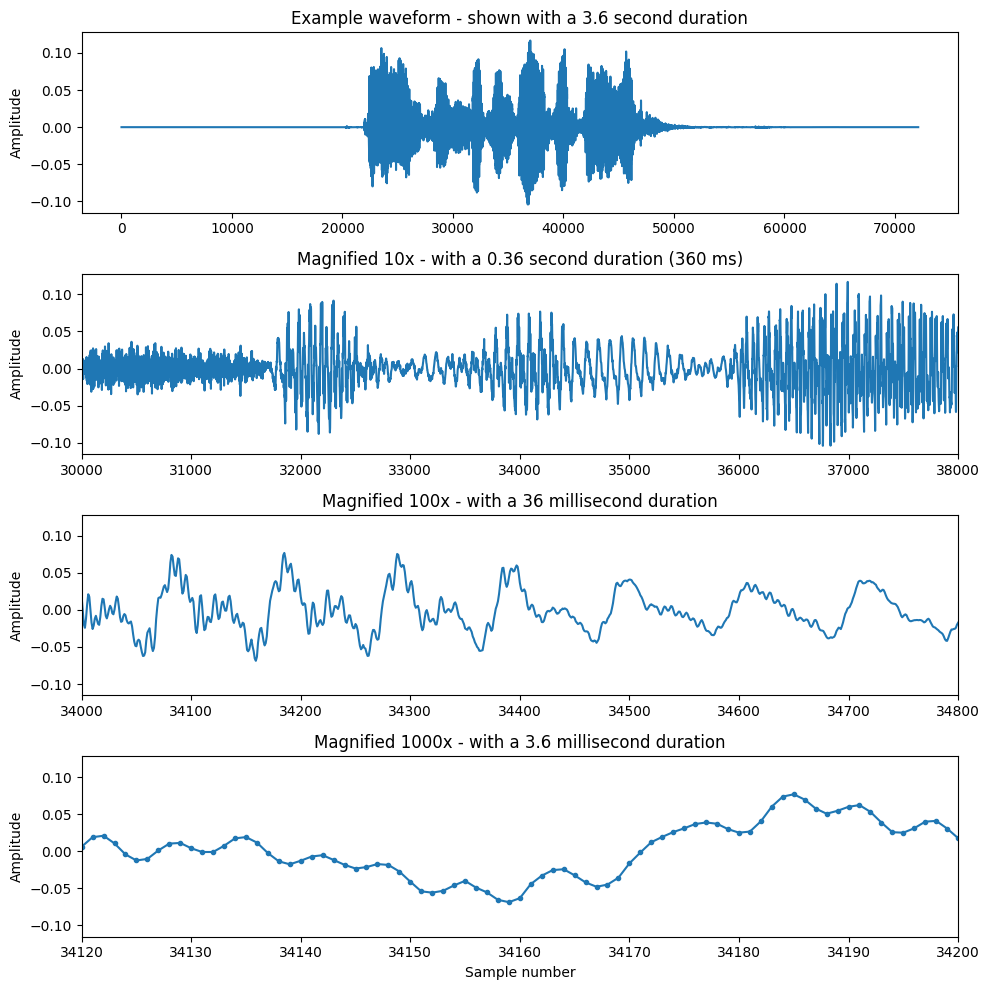

In [19]:
plt.subplots(4,1,figsize=(10,10))

plt.subplot(4,1,1)
plt.plot(y)
plt.title('Example waveform - shown with a 3.6 second duration')
plt.ylabel('Amplitude')

plt.subplot(4,1,2)
plt.plot(y)
plt.title('Magnified 10x - with a 0.36 second duration (360 ms)')
plt.ylabel('Amplitude')
plt.xlim(30000,38000)

plt.subplot(4,1,3)
plt.plot(y)
plt.title('Magnified 100x - with a 36 millisecond duration')
plt.ylabel('Amplitude')
plt.xlim(34000,34800)

plt.subplot(4,1,4)
plt.plot(y,marker='.')
plt.title('Magnified 1000x - with a 3.6 millisecond duration')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.xlim(34120,34200)

plt.tight_layout()
plt.show()

As we zoom in at shorter and shorter time scales, we can see individual measurements of amplitude. As audio listeners, we don't perceive individual fluctations. Instead, we perceive component freqeuncies as pitch. To visualize this, we use a mel spectrogram.

## Visualizing audio with a mel spectrogram

To visualize this, we break the waveform up into its component frequencies. We then examine these frequencies over short windows of time and calculate the mean value of the absolute value of amplitude. This is a measure of intensity that humans perceive as loudness. Frequency, loudness, and time give us three dimensions for visualizing audio.

Spectrogram plots make use of these three dimensions. Time is the x-axis. Frequency (pitch) is on the y-axis. Loundess or intensity is shown as pixel color.

Below is the same audio sample shown with both the waveform and the mel frequency spectrogram.

C:\Users\bahri\AppData\Local\Temp\ipykernel_21212\2396498133.py:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr=sr,x_axis='s')


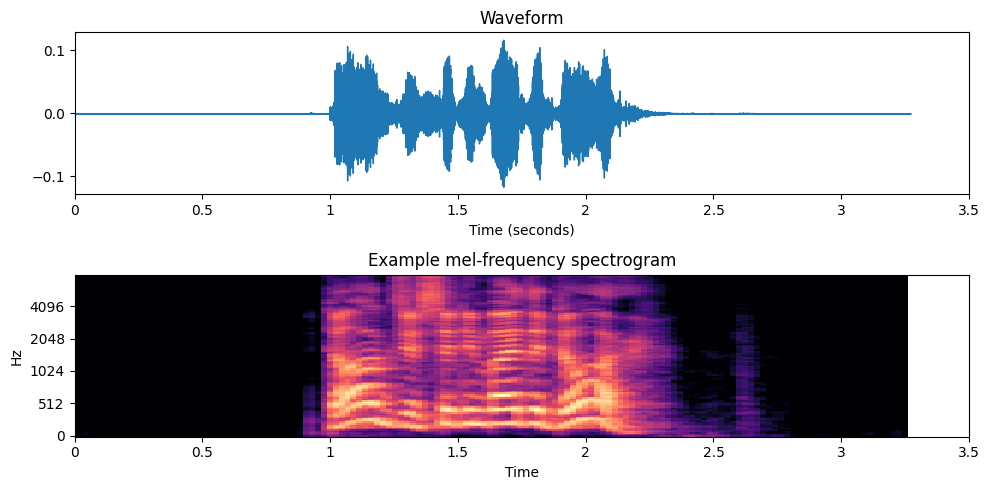

In [20]:
plt.subplots(2,1,figsize=(10,5))  

plt.subplot(2,1,1)
plt.title('Waveform')
librosa.display.waveshow(y, sr=sr,x_axis='s')
plt.xlim(0,3.5)
plt.subplot(2,1,2)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
#     ax[0].set(title='Mel-frequency spectrogram')
plt.title('Example mel-frequency spectrogram')
plt.xlim(0,3.5)

plt.tight_layout()
plt.show()

Note that the mel spectrogram shows freqeuncy on a log scale. This is done tob etter represetn how humans perceive pitch.
The human ear can easily distinguish between 250Hz and 500Hz, but finds it very difficult to distinguish between 10,000Hz and 10,250Hz.

## Conclusion

**Conclusion**

Sounds is wave described by amplitude and frequency. Humans perceive amplitude as loudness and frequency as pitch. When sound is recorded digitially, the resulting file consist of a sample rate with an integer value as well as a one dimensional array with it elements showing flucations in ampltude. This array can be modified with numerical operations to change the resulting sound.

Sound can easily be viewed as a waveform which readily shows variations in intensity (loudness). It can also be visualized using a spectrogram which shows the stregth of different frequencies over time.

In Part_2, we examine the overall dataset and delve deeper in the audio files it contains.